### Importando Bibliotecas Usadas

In [35]:
import pandas as pd
import matplotlib.pyplot as plt


### 1 - Lendo o arquivo

In [18]:
data = pd.read_csv('E:/googleplaystore.csv')


In [19]:
data.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


### 2 - Grafico de Barras - Top 5 apps por numero de instalação

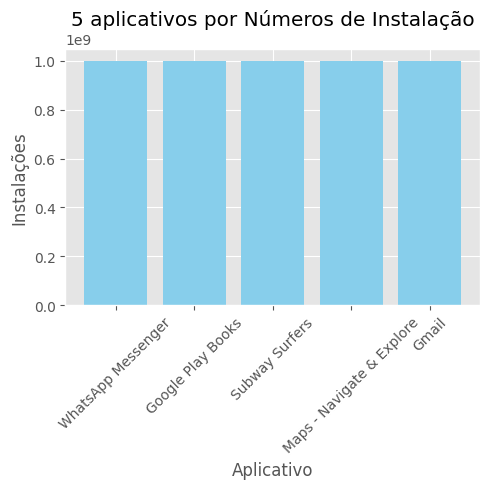

In [20]:
tab_sem_dupl = data.drop_duplicates('App')
tab_sem_dupl = tab_sem_dupl.drop(index=10472)
tab_sem_dupl['Installs'] = tab_sem_dupl['Installs'].str.replace('+', '', regex=False)
tab_sem_dupl['Installs'] = tab_sem_dupl['Installs'].str.replace(',', '')
tab_sem_dupl['Installs'] = pd.to_numeric(tab_sem_dupl['Installs'])

tab_sem_dupl_pronta = tab_sem_dupl[['App', 'Installs']].sort_values(by='Installs', ascending=False).head(5)

plt.style.use('ggplot')
plt.figure(figsize=(5, 5))
plt.bar(tab_sem_dupl_pronta['App'], tab_sem_dupl_pronta['Installs'], color='skyblue')
plt.title('5 aplicativos por Números de Instalação')
plt.xlabel('Aplicativo')
plt.ylabel('Instalações')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



### 3 - Grafio de Pizza - Categoria de Apps do Dataset por Frequência

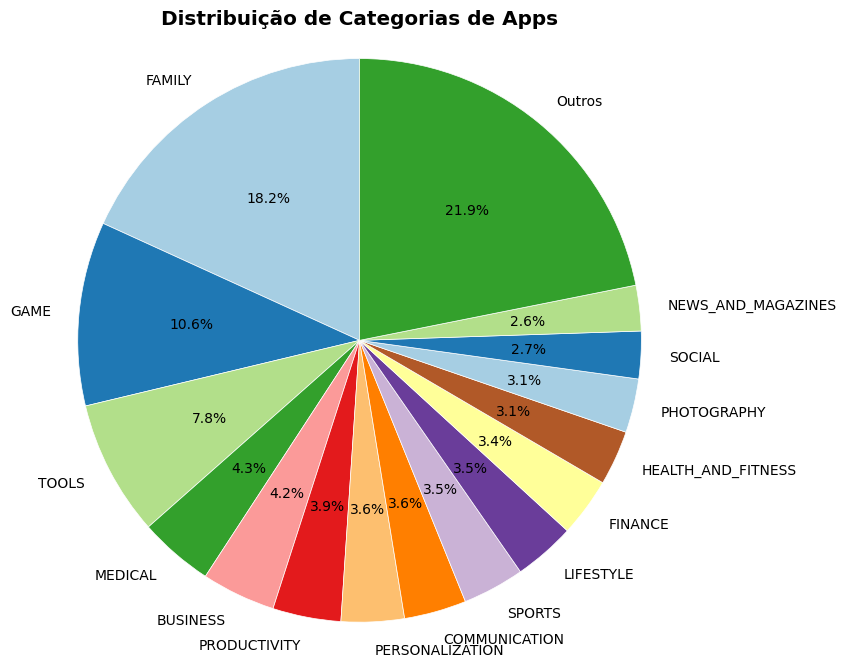

In [45]:
contagem_categorias = data['Category'].value_counts()
total = contagem_categorias.sum()
percentuais_categorias = (contagem_categorias / total) * 100
categorias_filtradas = percentuais_categorias[percentuais_categorias >= 2.4]
outras_porcentagens = percentuais_categorias[percentuais_categorias < 2.4].sum()

if outras_porcentagens > 0:
    categorias_filtradas['Outros'] = outras_porcentagens

plt.style.use('ggplot')
plt.figure(figsize=(8, 8))
plt.pie(categorias_filtradas, labels=categorias_filtradas.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors, wedgeprops={'edgecolor': 'white'})
plt.title('Distribuição de Categorias de Apps', fontweight='bold')
plt.axis('equal')
plt.show()


### 4 - Consulta do App mais caro do Dataset

In [488]:
tab_sem_dupl = data.drop_duplicates('App')
tab_sem_dupl = tab_sem_dupl.drop(index=10472)
tab_sem_dupl['Installs'] = tab_sem_dupl['Installs'].str.replace('+', '', regex=False)
tab_sem_dupl['Installs'] = tab_sem_dupl['Installs'].str.replace(',', '')
tab_sem_dupl['Installs'] = pd.to_numeric(tab_sem_dupl['Installs'])

tab_sem_dupl['Price'] = tab_sem_dupl['Price'].str.replace('$', '', regex=False)
tab_sem_dupl['Price'] = pd.to_numeric(tab_sem_dupl['Price'])

app_mais_caro = tab_sem_dupl[['App', 'Price']].sort_values(by='Price', ascending=False).head(1)
app_mais_caro 
    

,App,Price
4367,I'm Rich - Trump Edition,400.0


### 5 - Consulta do Numero de Apps 'Mature 17' no Dataset

In [392]:
apps_17y = tab_sem_dupl.query('`Content Rating` == "Mature 17+"')[['App', 'Content Rating']]
apps_17y = apps_17y.groupby('App')['Content Rating'].first().reset_index().sort_values(by='App')
apps_17y = apps_17y.shape[0]

print(f'O numero de apps classificados como Mature 17 é {apps_17y}!')


O numero de apps classificados como Mature 17 é 393!


### 6 - Consulta do Top 10 itens por números de Review

In [497]:
tab_sem_dupl['Reviews'] = pd.to_numeric(tab_sem_dupl['Reviews'])
maiores_reviews = tab_sem_dupl[['App', 'Reviews']].sort_values(by='Reviews', ascending=False).reset_index(drop=True).head(10)

maiores_reviews


,App,Reviews
0,Facebook,78158306
1,WhatsApp Messenger,69119316
2,Instagram,66577313
3,Messenger – Text and Video Chat for Free,56642847
4,Clash of Clans,44891723
5,Clean Master- Space Cleaner & Antivirus,42916526
6,Subway Surfers,27722264
7,YouTube,25655305
8,"Security Master - Antivirus, VPN, AppLock, Boo...",24900999
9,Clash Royale,23133508


### 7 - Criação Dataset 1 - Apps mais caros por categoria

In [394]:
apps_pagos = tab_sem_dupl[tab_sem_dupl['Price'] > 0]
idx = apps_pagos.groupby('Category')['Price'].idxmax()
apps_mais_caros = apps_pagos.loc[idx, ['App', 'Category', 'Price']]
apps_mais_caros = apps_mais_caros.sort_values(by='Price', ascending=False).reset_index()

apps_mais_caros

,index,App,Category,Price
0,4367,I'm Rich - Trump Edition,LIFESTYLE,400.00
1,5356,I Am Rich Premium,FINANCE,399.99
2,4197,most expensive app (H),FAMILY,399.99
3,9719,EP Cook Book,MEDICAL,200.00
4,6692,cronometra-br,PRODUCTIVITY,154.99
5,6624,BP Fitness Lead Scanner,EVENTS,109.99
6,9730,Lean EQ,BUSINESS,89.99
7,3039,Golfshot Plus: Golf GPS,SPORTS,29.99
8,8328,Guide to Nikon Df,PHOTOGRAPHY,29.99
9,4177,G-NetReport Pro,TOOLS,25.99


### 7 - Criação Dataset 2 - Apps com maior número de Reviews da categoria Medicina

In [494]:
medicina_apps = tab_sem_dupl[tab_sem_dupl['Genres'].str.contains('Medical', case=False, na=False)].copy()
medicina_apps['Reviews'] = pd.to_numeric(medicina_apps['Reviews'], errors='coerce')
app_mais_reviews = pd.DataFrame(medicina_apps.loc[medicina_apps['Reviews'].idxmax()]).T

app_mais_reviews


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2319,My Calendar - Period Tracker,MEDICAL,4.7,156410,14M,5000000,Free,0,Everyone,Medical,"August 3, 2018",5.9.6,4.1 and up


### 8 - Grafico 1 - Histograma - Distribuição das avaliações da categoria GAME

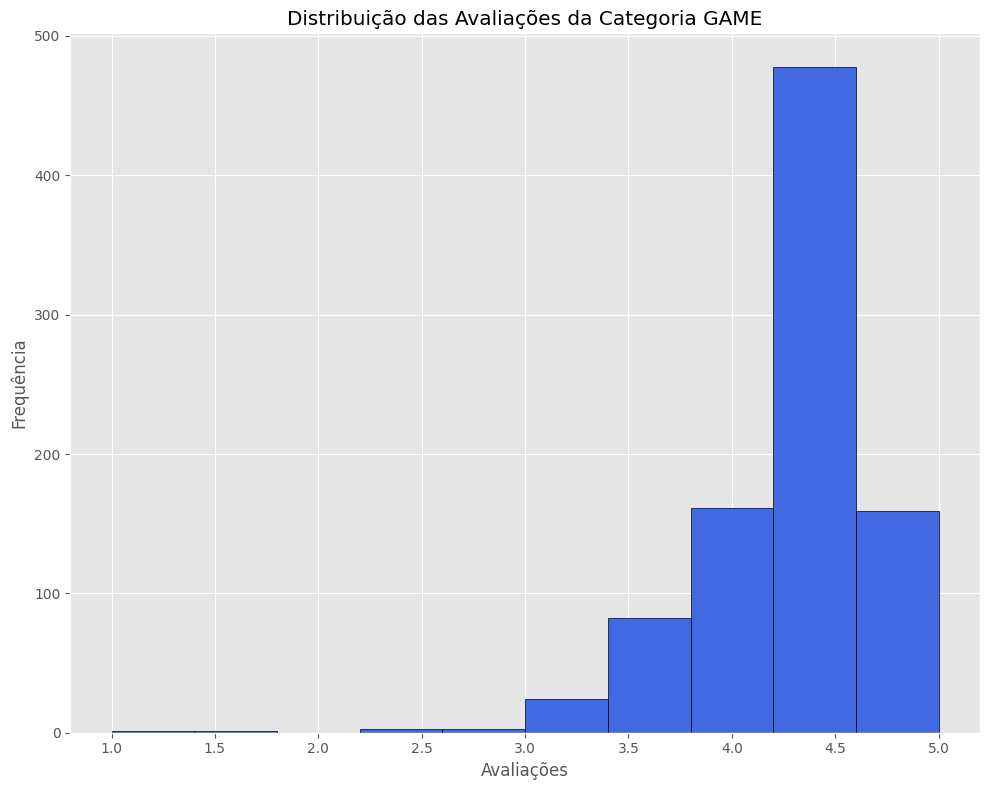

In [29]:
games = tab_sem_dupl[tab_sem_dupl['Category'] == 'GAME']

plt.style.use('ggplot')
plt.figure(figsize=(10, 8))
plt.hist(games['Rating'], bins=10, color='royalblue', edgecolor='black')
plt.xlabel('Avaliações')
plt.ylabel('Frequência')
plt.title('Distribuição das Avaliações da Categoria GAME')
plt.tight_layout()
plt.show()


- Conclui-se através da interpretação do gráfico acima que a nota de avaliação mais recebida na categoria GAMES é de 4.5.

### 8 - Grafico 2 - Grafico de Dispersão - Dispersão entre Instações e Avaliações

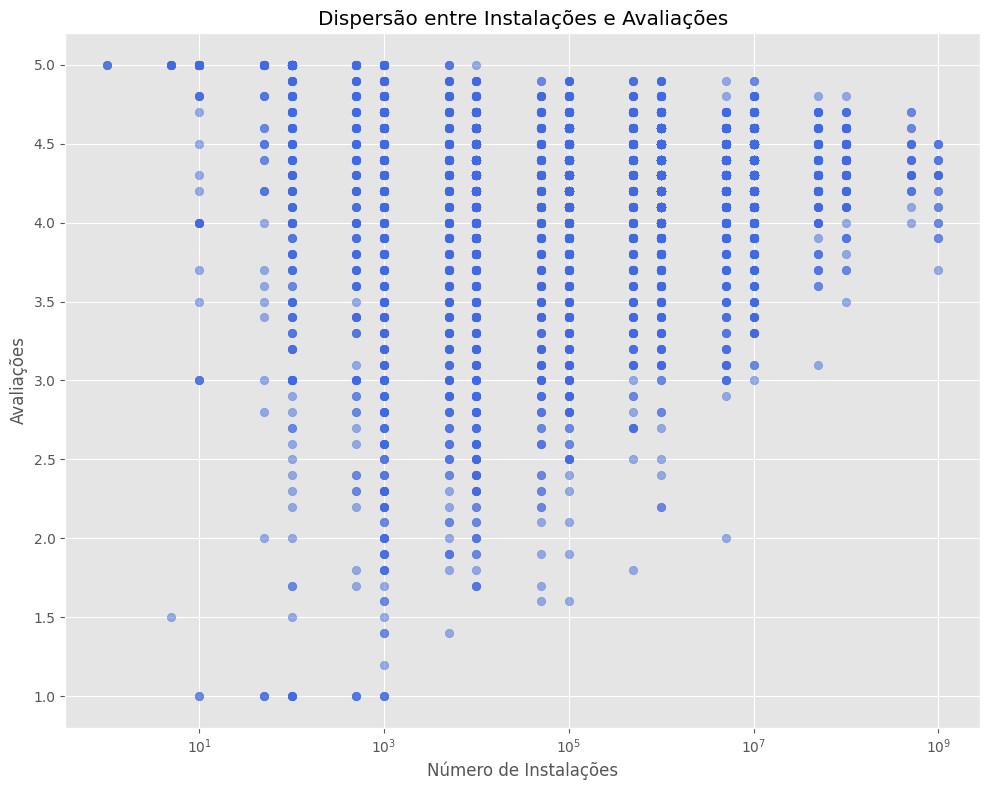

In [30]:
tab_sem_dupl['Installs'] = tab_sem_dupl['Installs'].astype(str).str.replace(',', '').str.replace('+', '')
tab_sem_dupl['Installs'] = pd.to_numeric(tab_sem_dupl['Installs'], errors='coerce')
tab_sem_dupl['Rating'] = pd.to_numeric(tab_sem_dupl['Rating'], errors='coerce')

dados_final = tab_sem_dupl.dropna(subset=['Installs', 'Rating'])

plt.style.use('ggplot')
plt.figure(figsize=(10, 8))
plt.scatter(dados_final['Installs'], dados_final['Rating'], alpha=0.5, color='royalblue')
plt.title('Dispersão entre Instalações e Avaliações')
plt.xlabel('Número de Instalações')
plt.ylabel('Avaliações')
plt.xscale('log')  
plt.tight_layout()
plt.show()


- Uma das possiveis interpretações do gráfico acima: quanto maior o numero de instalações, menor o numero de avaliações negativas.

- Quando o numero de instalação é muito baixo podem ocorrer 2 casos:   
    - 1. *A nota de avaliação é muito alta* - pois poucas avaliações altas (ainda em maior numero quea avaliações baixas) puxam a nota para cima.
    - 2. *A nota de avaliação é muito baixa* -  pois poucas avaliações baixas (ainda em maior numero que avaliações altas) puxam a nota para baixo.